# Campaign for selling personal loans

### Problem Description:
   This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

   The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


### Dataset Description: 
   The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

### Feature Description:
1) ID - Customer ID							
2) Age - Customer's age in completed years							
3) Experience - #years of professional experience							
4) Income -	Annual income of the customer ($000)

5) ZIPCode - Home Address ZIP code.							
6) Family -	Family size of the customer						
7) CCAvg - Avg. spending on credit cards per month ($000)

8) Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional                    			
9) Mortgage - Value of house mortgage if any. ($000)							
10) Personal Loan - Did this customer accept the personal loan offered in the last campaign?                 
11) Securities Account - Does the customer have a securities account with the bank?		
12) CD Account - Does the customer have a certificate of deposit (CD) account with the bank?                          
13) Online - Does the customer use internet banking facilities?							
14) CreditCard - Does the customer use a credit card issued by UniversalBank? 

# 1. Read the column description and ensure you understand each attribute well

In [1]:
# Import all necessary modules
import numpy as np
import pandas as pd

import matplotlib as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,9)})

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from scipy.stats import zscore

In [2]:
# Verify current working directory
import os 
print(os.getcwd()) 

C:\Users\Venkatesh K Govindan\PGP-AIML\Project\Residency-3


In [3]:
# Load Bank Personal Loan Modelling dataset into dataframe
bank_cust_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv', index_col = 0)
bank_cust_df.head(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [4]:
# Rename column labels
bank_cust_df.columns = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']
bank_cust_df.head(3)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [5]:
bank_cust_df_copy = bank_cust_df.copy()

In [6]:
# Verify count of rows and columns in bank_cust_df DataFrame 
bank_cust_df.shape

(5000, 13)

In [7]:
#  Prints information about bank_cust_df DataFrame, verify column data types and non-null values 
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [8]:
bank_cust_df.apply(lambda x : sum(x.isnull()))

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

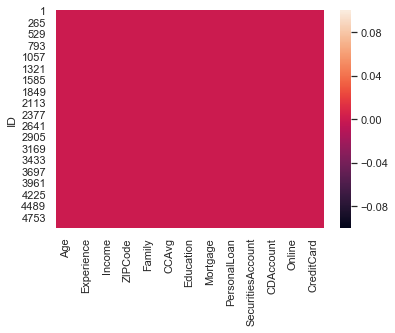

In [9]:
sns.heatmap(bank_cust_df.isnull())

## Observation: 
* No null or missing values in dataset

In [10]:
bank_cust_df.count()

Age                  5000
Experience           5000
Income               5000
ZIPCode              5000
Family               5000
CCAvg                5000
Education            5000
Mortgage             5000
PersonalLoan         5000
SecuritiesAccount    5000
CDAccount            5000
Online               5000
CreditCard           5000
dtype: int64

In [11]:
bank_cust_df.apply(lambda x: len(x.unique()))

Age                   45
Experience            47
Income               162
ZIPCode              467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

In [12]:
print('Frequency count for Family\n',bank_cust_df['Family'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['Family'].value_counts().sum())

Frequency count for Family
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Sum of frquency count:  5000


In [13]:
print('Frequency count for Education\n',bank_cust_df['Education'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['Education'].value_counts().sum())

Frequency count for Education
 1    2096
3    1501
2    1403
Name: Education, dtype: int64

Sum of frquency count:  5000


In [14]:
print('Frequency count for Personal Loan\n',bank_cust_df['PersonalLoan'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['PersonalLoan'].value_counts().sum())

Frequency count for Personal Loan
 0    4520
1     480
Name: PersonalLoan, dtype: int64

Sum of frquency count:  5000


In [15]:
print('Frequency count for Securities Account\n',bank_cust_df['SecuritiesAccount'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['SecuritiesAccount'].value_counts().sum())

Frequency count for Securities Account
 0    4478
1     522
Name: SecuritiesAccount, dtype: int64

Sum of frquency count:  5000


In [16]:
print('Frequency count for CD Account\n',bank_cust_df['CDAccount'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['CDAccount'].value_counts().sum())

Frequency count for CD Account
 0    4698
1     302
Name: CDAccount, dtype: int64

Sum of frquency count:  5000


In [17]:
print('Frequency count for Online\n',bank_cust_df['Online'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['Online'].value_counts().sum())

Frequency count for Online
 1    2984
0    2016
Name: Online, dtype: int64

Sum of frquency count:  5000


In [18]:
print('Frequency count for CreditCard\n',bank_cust_df['CreditCard'].value_counts())
print('\nSum of frquency count: ',bank_cust_df['CreditCard'].value_counts().sum())

Frequency count for CreditCard
 0    3530
1    1470
Name: CreditCard, dtype: int64

Sum of frquency count:  5000


### Understanding on column attributes in dataframe

* ID - Person's customer ID, no relation between ID and loan. We can't conclude future potential loan customers with this column, so setting this as a row index for the dataset.

* ZIPCode - Customer's home address ZIP code.

##### Ordinal columns:
* Family - Customer's Family size; valid values are 1, 2, 3 & 4

* Education - Customer's education level valid values are 1, 2 & 3

##### Categorical columns with valid values 0 - No or 1 - Yes
 
* PersonalLoan - Customer have a personal loan with the bank? ------=> target variable

* SecuritiesAccount - Customer have a securities account with the bank?

* CD Account - Customer have a certificate of deposit (CD) account with the bank?

* Online - Customer use internet banking facilities?

* Credit Card - Customer use a credit card?

##### Interval Columns:

* Age - Customer's age

* Experience - Customer's years of experience

* Income - Customer's annual income

* CCAvg - Customer's average credit card spending

* Mortage - Customer's Value of House Mortgage

In [19]:
bank_cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


## Observation: 

* There are negative values in the Experience, min of Experience is -3.0. 

In [20]:
bank_cust_df[bank_cust_df['Experience'] < 0]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [21]:
bank_cust_df[bank_cust_df['Experience'] < 0]['Experience'].count()

52

## Observation: 
* There are 52 customers with negative Experience, this has to be cleaned. Years of professional experience of a person can't be a negative value.

In [22]:
negexp_df_indx = bank_cust_df[bank_cust_df['Experience'] < 0].index.tolist()
negexp_df_indx[:10]

[90, 227, 316, 452, 525, 537, 541, 577, 584, 598]

In [23]:
bank_cust_df_posexp = bank_cust_df[bank_cust_df['Experience'] >= 0]
bank_cust_df_posexp.head(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
for i in negexp_df_indx:
    age = bank_cust_df.loc[bank_cust_df.index == i, 'Age'].tolist()[0]
    education = bank_cust_df.loc[bank_cust_df.index == i, 'Education'].tolist()[0]
    filtered_df = bank_cust_df_posexp[(bank_cust_df_posexp.Age == age) & (bank_cust_df_posexp.Education == education)]
    experience = filtered_df.Experience.median()
    bank_cust_df.loc[bank_cust_df.index == i, 'Experience'] = experience

In [25]:
bank_cust_df[bank_cust_df['Experience'] < 0]['Experience'].count()

0

In [26]:
bank_cust_df.loc[negexp_df_indx]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,0.0,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,0.0,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,0.0,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,3.0,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,0.0,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,0.0,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,0.0,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,0.0,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,0.0,38,95045,2,1.70,2,0,0,0,0,1,0


## Observation: 
* Now negative Experience count is 0, replaced negative Experience value with median of Experience for corresponding Age and Education.

* Now see NaN vaules in Experience for rows with Age 23.

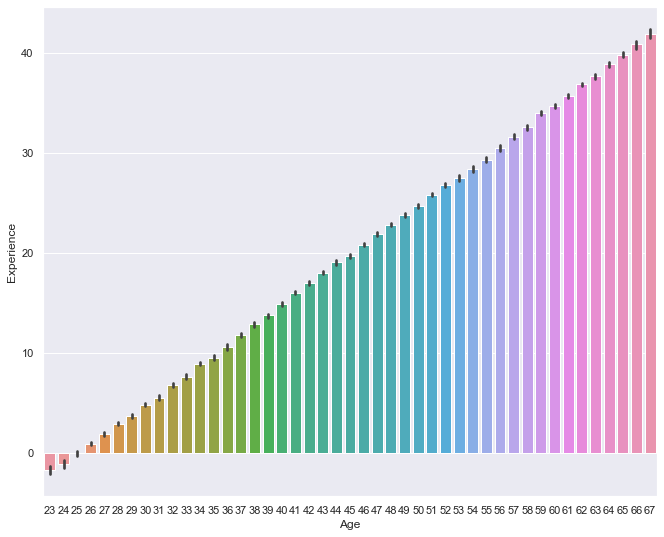

In [27]:
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(11,9)})
sns.barplot(x='Age', y='Experience', data=bank_cust_df_copy)

In [28]:
bank_cust_df_copy[bank_cust_df['Age']==23]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
671,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
910,23,-1,149,91709,1,6.33,1,305,0,0,0,0,1
2431,23,-1,73,92120,4,2.60,1,0,0,0,0,1,0
2619,23,-3,55,92704,3,2.40,2,145,0,0,0,1,0
2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1
3158,23,-1,13,94720,4,1.00,1,84,0,0,0,1,0
3426,23,-1,12,91605,4,1.00,1,90,0,0,0,1,0


## Observation:
* All rows for Age 23 are with negative Experience, because of this replaced Experience value is NaN. Replace this NaN with 0.

In [29]:
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           4988 non-null float64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 706.9 KB


In [30]:
bank_cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,4988.0,20.171411,11.405873,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [31]:
bank_cust_df = bank_cust_df.fillna(0)

In [32]:
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                  5000 non-null int64
Experience           5000 non-null float64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(2), int64(11)
memory usage: 706.9 KB


In [33]:
bank_cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.123000,11.434860,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
SecuritiesAccount,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


# 2. Study the data distribution in each attribute, share your findings. (10 points)

In [34]:
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(6,5)})

In [35]:
bank_cust_df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [36]:
bank_cust_df.Age.describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

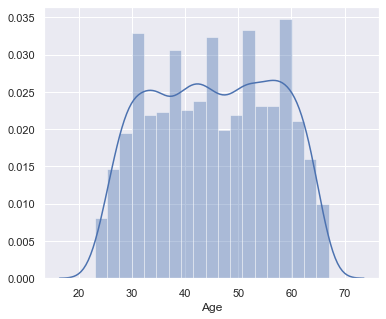

In [37]:
sns.distplot(bank_cust_df.Age)

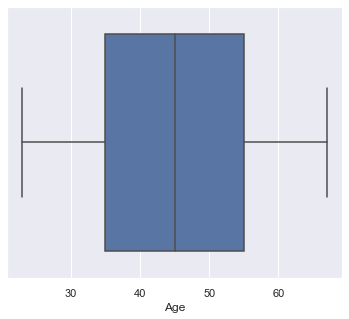

In [38]:
sns.boxplot(bank_cust_df.Age)

## Observation:
* Age feature is normally distributed, Mean and Median are almost equal to 45. Also majority of the customer's age is between 30 and 60.

In [39]:
bank_cust_df.Experience.describe()

count    5000.00000
mean       20.12300
std        11.43486
min         0.00000
25%        10.00000
50%        20.00000
75%        30.00000
max        43.00000
Name: Experience, dtype: float64

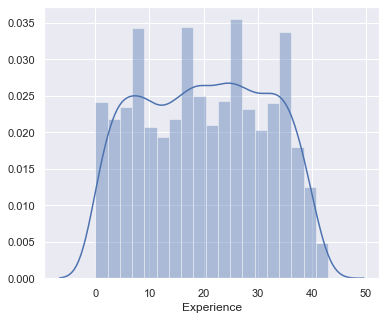

In [40]:
sns.distplot(bank_cust_df.Experience)

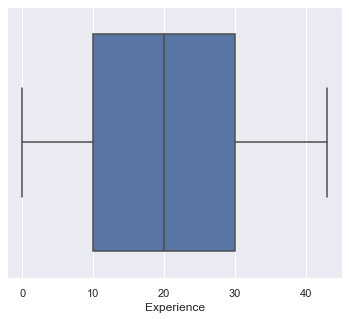

In [41]:
sns.boxplot(bank_cust_df.Experience)

## Observation: 
* Experience feature is normally distributed, Mean and Median are almost equal to 20. Also majority of the customer's experience is between 8 and 36.

In [42]:
bank_cust_df.Income.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

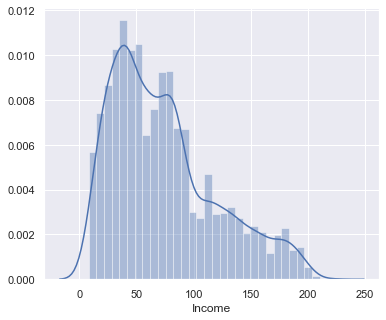

In [43]:
sns.distplot(bank_cust_df.Income)

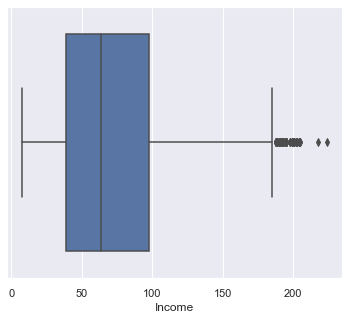

In [44]:
sns.boxplot(bank_cust_df.Income)

## Observation: 
* Distribution of Income feature is positively or right skewed, Mean (73.77) is greater than Median (64). 
* Majority of the customer's income is around 45K and 95K.
* Has outlier on right, Income above 186K will be considered as outliers.

In [45]:
bank_cust_df.ZIPCode.describe()

count     5000.000000
mean     93152.503000
std       2121.852197
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIPCode, dtype: float64

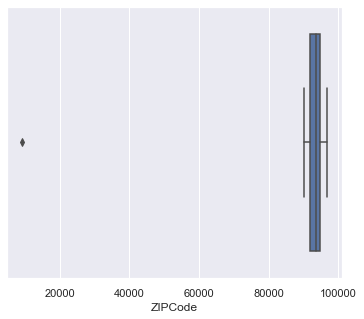

In [46]:
sns.boxplot(bank_cust_df.ZIPCode)

## Observation: 
* Distribution of ZIPCode feature is normal, mean is almost equal to median.
* Has outlier on left, ZIPCode 9307(min value) is an outlier.

In [47]:
bank_cust_df.Family.describe()

count    5000.000000
mean        2.396400
std         1.147663
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

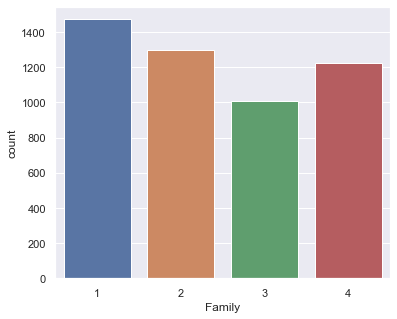

In [48]:
sns.countplot(bank_cust_df.Family)

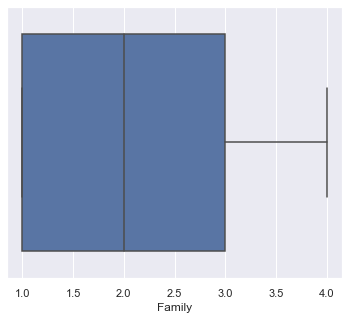

In [49]:
sns.boxplot(bank_cust_df.Family)

## Observation: 
* Distribution of Family feature is uniform. Median is 2 for feature Family, min family members is 1 and max is 4.  

In [50]:
bank_cust_df.CCAvg.describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

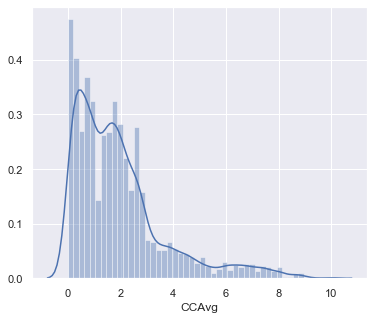

In [51]:
sns.distplot(bank_cust_df.CCAvg)

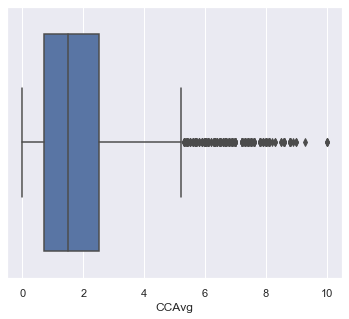

In [52]:
sns.boxplot(bank_cust_df.CCAvg)

## Observation:
* Distribution for CCAvg is positively or right skewed. Mean is greater than the median value.
* Outliers are only towards right. 5.2K is upper whisker, any value for CCAvg above this is outliers.

In [53]:
bank_cust_df.Education.describe()

count    5000.000000
mean        1.881000
std         0.839869
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Education, dtype: float64

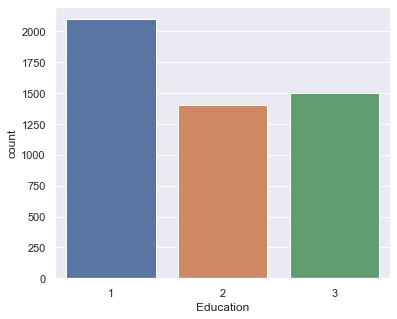

In [54]:
sns.countplot(bank_cust_df.Education)

## Observation:
* Majority of the customer's are with Education level 1. 

In [55]:
bank_cust_df.Mortgage.describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

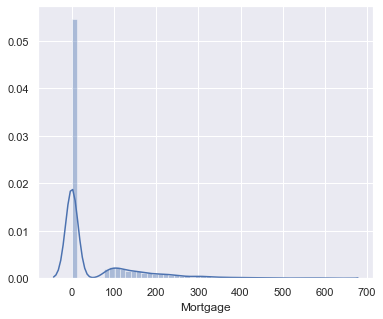

In [56]:
sns.distplot(bank_cust_df.Mortgage)

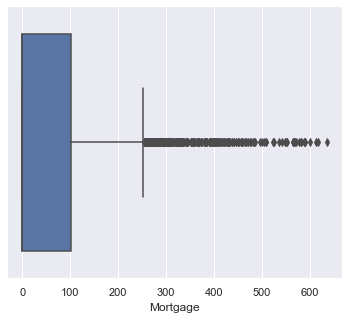

In [57]:
sns.boxplot(bank_cust_df.Mortgage)

## Observation: 
* Distribution on Mortgage feature is positively or right skewed.
* Almost 50% of the customers, value of house mortgage is 0.
* Outliers are towards right. Upper whisker is 252.5K, any value beyond this is outlier. 

In [58]:
bank_cust_df.PersonalLoan.describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PersonalLoan, dtype: float64

In [59]:
bank_cust_df.PersonalLoan.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

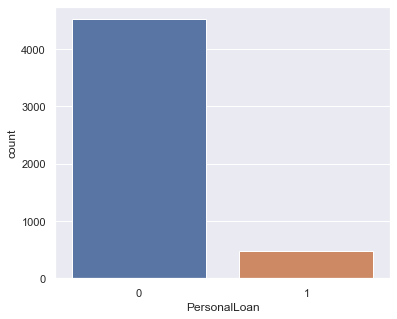

In [60]:
sns.countplot(bank_cust_df.PersonalLoan)

## Observation:
* Majority of the coustomer's (4520/5000) are not having personal loan with the bank.  

In [61]:
bank_cust_df.SecuritiesAccount.describe()

count    5000.000000
mean        0.104400
std         0.305809
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SecuritiesAccount, dtype: float64

In [62]:
bank_cust_df.SecuritiesAccount.value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

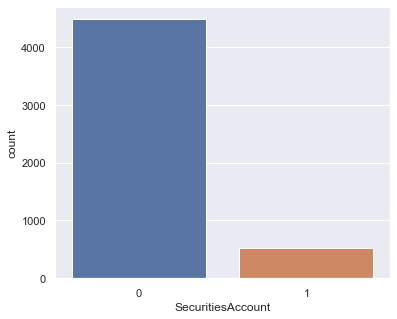

In [63]:
sns.countplot(bank_cust_df.SecuritiesAccount)

## Observation:
* Majority of the coustomer's (4478/5000) are not having securities account with the bank.    

In [64]:
bank_cust_df.CDAccount.describe()

count    5000.00000
mean        0.06040
std         0.23825
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: CDAccount, dtype: float64

In [65]:
bank_cust_df.CDAccount.value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

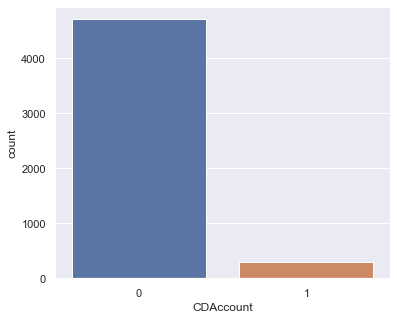

In [66]:
sns.countplot(bank_cust_df.CDAccount)

## Observation:
• Majority of the coustomer's (4698/5000) are not having CD account with the bank.

In [67]:
bank_cust_df.Online.describe()

count    5000.000000
mean        0.596800
std         0.490589
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Online, dtype: float64

In [68]:
bank_cust_df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

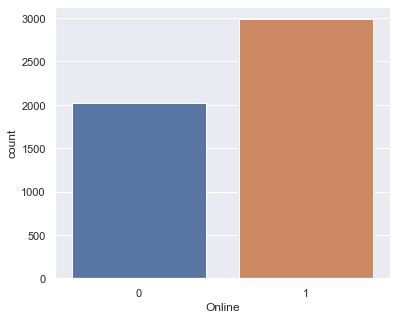

In [69]:
sns.countplot(bank_cust_df.Online)

## Observation:
* Majority of the customer's (2984/5000) are having online banking option.

In [70]:
bank_cust_df.CreditCard.describe()

count    5000.000000
mean        0.294000
std         0.455637
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CreditCard, dtype: float64

In [71]:
bank_cust_df.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

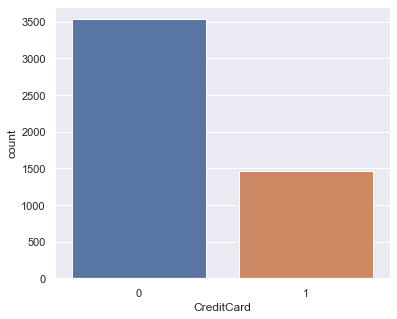

In [72]:
sns.countplot(bank_cust_df.CreditCard)

## Observation:
* Majority of the Customer's (3530/5000) are not using credit card.

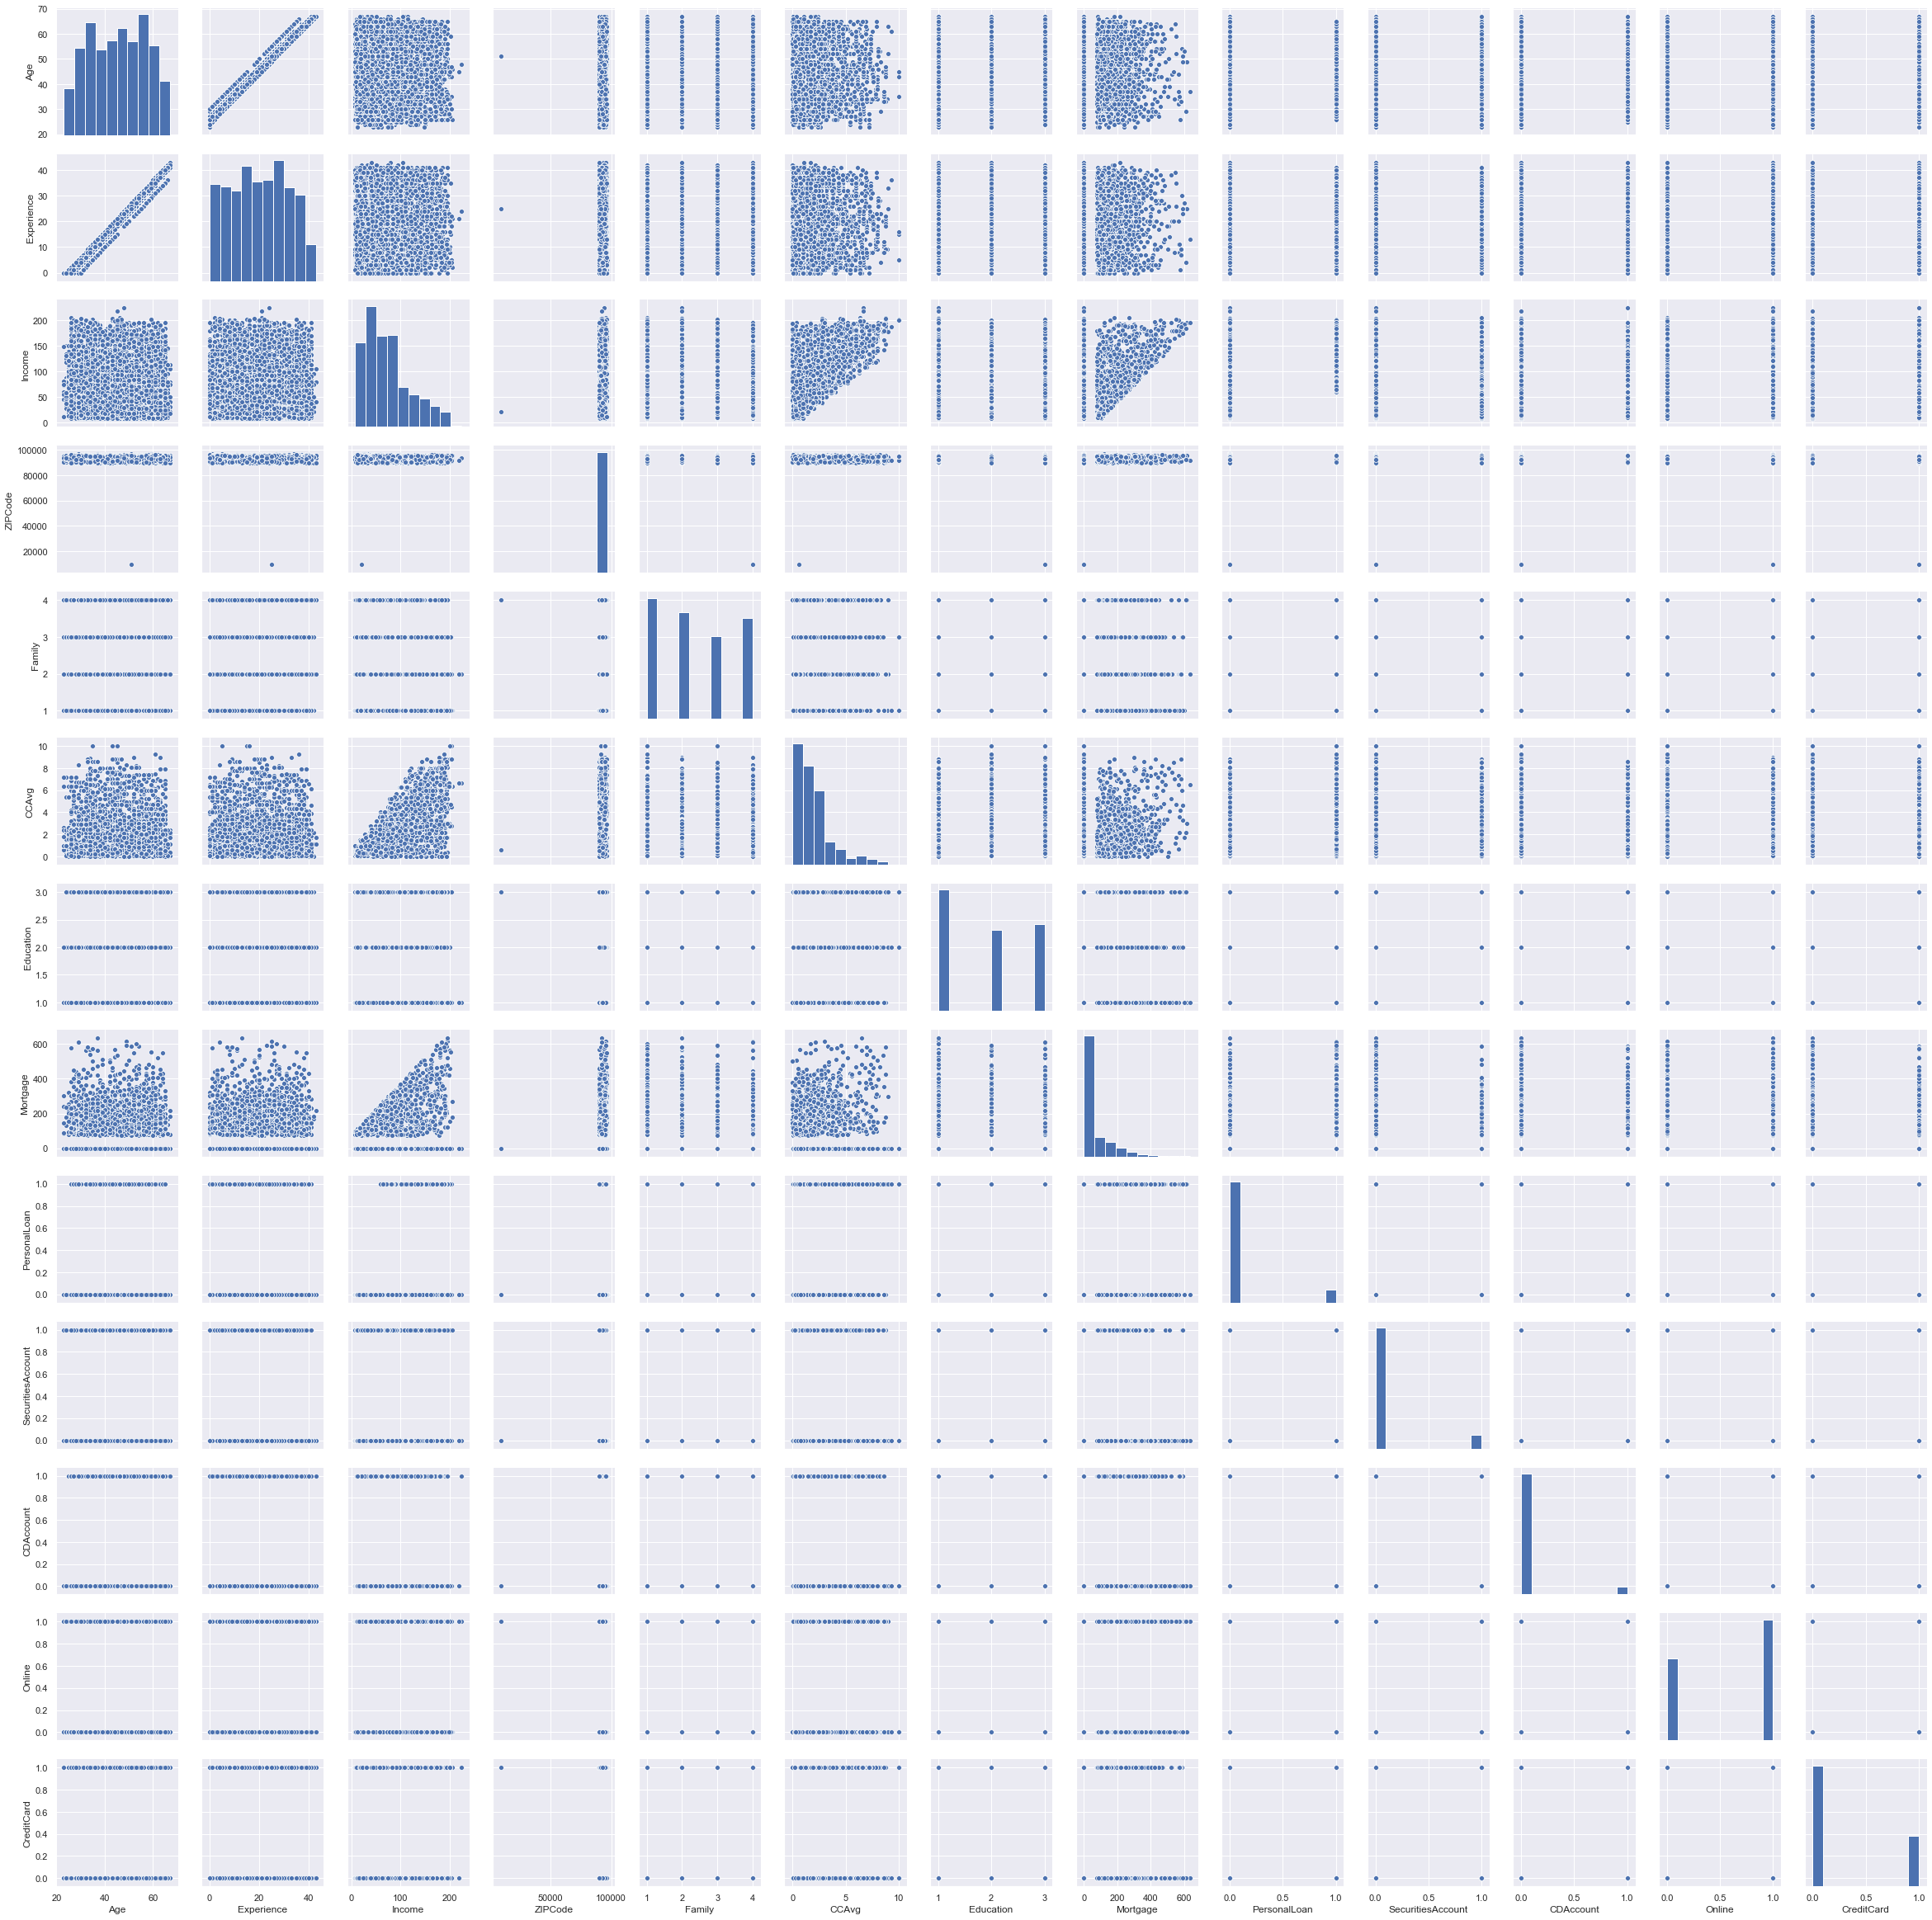

In [73]:
sns.pairplot(bank_cust_df)

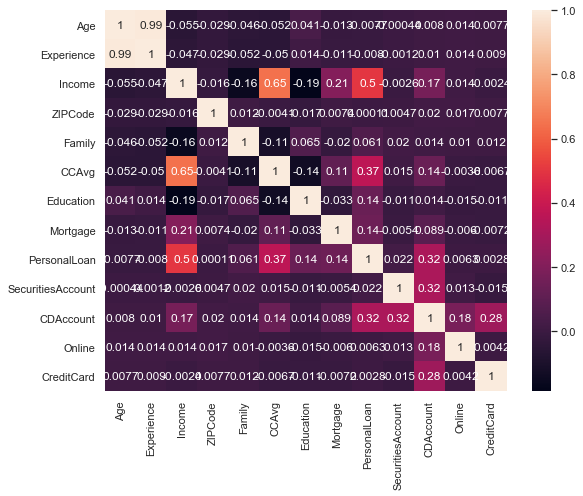

In [74]:
sns.set(style='darkgrid', palette='deep', rc={'figure.figsize':(9,7)})
sns.heatmap(bank_cust_df.corr(),annot=True)

## Observation:
* Positively strong correlation b/w Age and Experience features.
* Fairly storng positive correlation b/w Income and CCAvg features.
* Moderately strong positive correlation b/w Income and Personal Loan features. 

## Comapre the feature columes with target column distribution. 

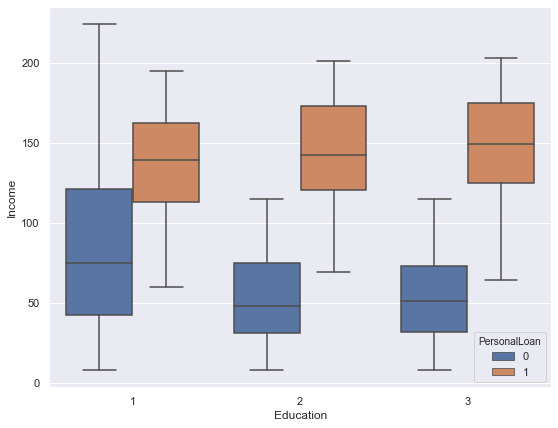

In [75]:
sns.boxplot(x='Education', y='Income', hue='PersonalLoan', data=bank_cust_df)

## Observation:
* The box plots show that customer's with education level 1 have higher incomes.
* Income distribution is almost similar across all education level's for the customer's having Personal Loan.

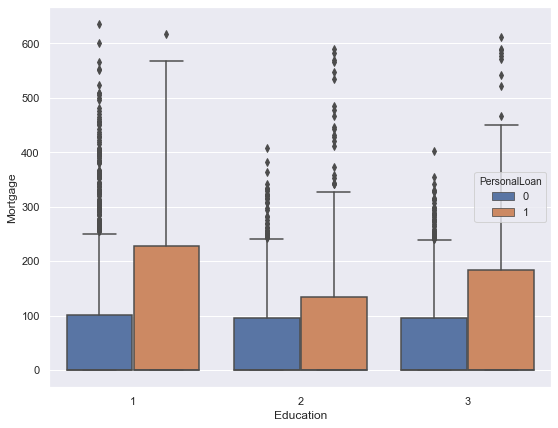

In [76]:
sns.boxplot(x='Education', y='Mortgage', hue='PersonalLoan', data=bank_cust_df)

## Observation:
* Mortgage value is higher for the customer's having Personal Loan.

In [77]:
bank_cust_df[bank_cust_df.PersonalLoan==1]['ZIPCode'].value_counts().head()

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

## Observation:
* More customer's in ZIPcode location 94720 is having Personal Loan.

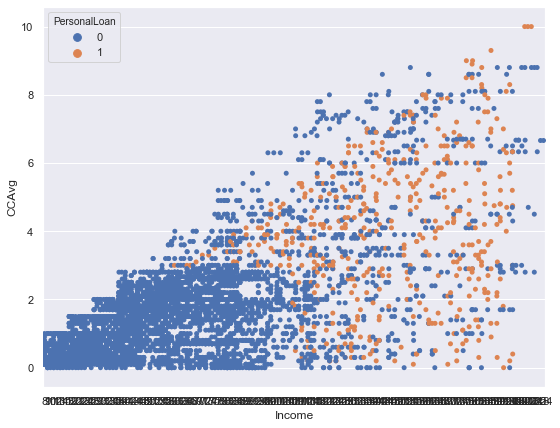

In [78]:
sns.stripplot(x='Income',y='CCAvg',hue='PersonalLoan',data=bank_cust_df)

## Observation:
* Increase in Income feature, increase in credit card average spending(CCAvg) feature.
* More Income and CCAvg, more the chances of having Personal Loan. 

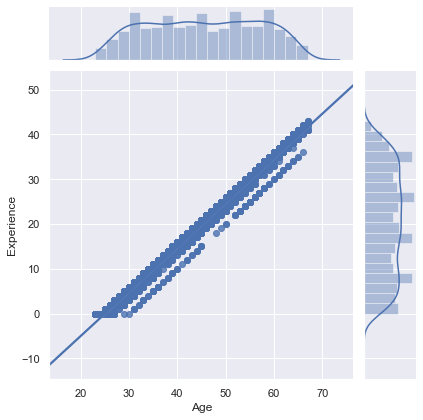

In [79]:
sns.jointplot(x='Age',y='Experience',data=bank_cust_df,kind="reg")

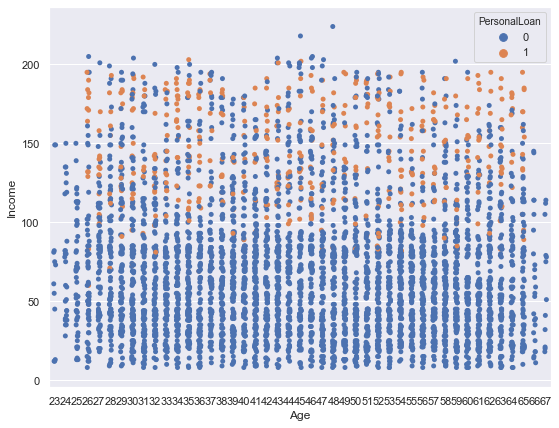

In [80]:
sns.stripplot(x='Age',y='Income',hue='PersonalLoan',data=bank_cust_df)

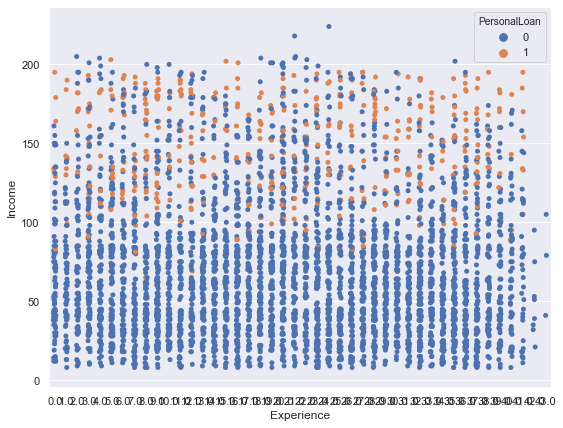

In [81]:
sns.stripplot(x='Experience',y='Income',hue='PersonalLoan',data=bank_cust_df)

## Observation:
* Age and Experience features are normally distributed and also strongly positively correlated.
* Both Income and Personal Loan features are uniformally distributed across Age and Experience features.
* More the Income, more chances the chances customer's go for Personal Loan.

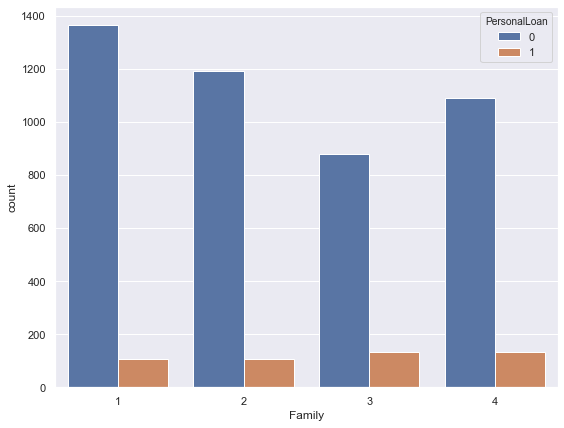

In [82]:
sns.countplot(x='Family',hue='PersonalLoan',data=bank_cust_df)

## Observation:
* Family member feature is not having significant impact on customer to avail personal loan.

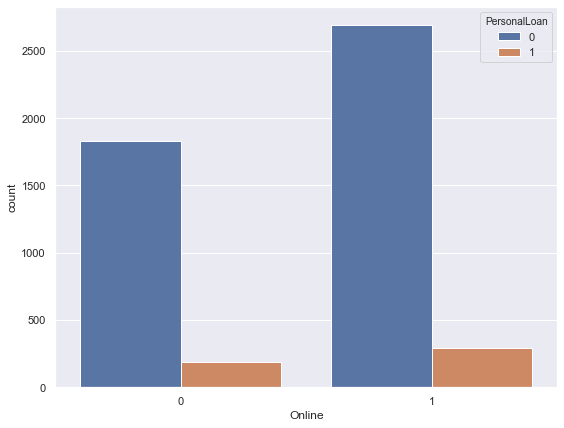

In [83]:
sns.countplot(x='Online',hue='PersonalLoan',data=bank_cust_df)

In [84]:
bank_cust_df[(bank_cust_df.Online==0) & (bank_cust_df.PersonalLoan==1)]['PersonalLoan'].count()

189

In [85]:
bank_cust_df[(bank_cust_df.Online==1) & (bank_cust_df.PersonalLoan==1)]['PersonalLoan'].count()

291

## Observation:
* Customer who has Personal Loan and Online banking(291) is not significant more when compared with customer who has Personal Loan and no Online banking(189). 

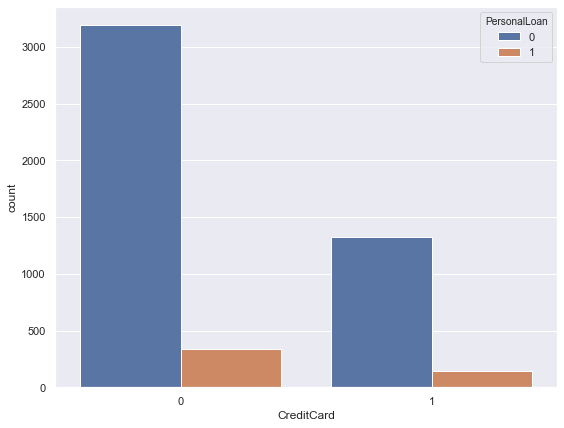

In [86]:
sns.countplot(x='CreditCard',hue='PersonalLoan',data=bank_cust_df)

In [87]:
bank_cust_df[(bank_cust_df.CreditCard==0) & (bank_cust_df.PersonalLoan==1)]['PersonalLoan'].count()

337

In [88]:
bank_cust_df[(bank_cust_df.CreditCard==1) & (bank_cust_df.PersonalLoan==1)]['PersonalLoan'].count()

143

## Observation:
* Customer who has Personal Loan and no Credit card(337) is comparatively less when compared with customer who has Personal Loan and Credit card(143). 
* But Credit card might not be a significant feature to tell customer will avail personal loan. 

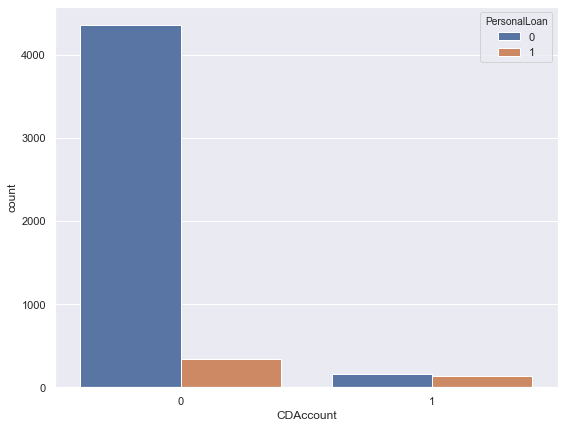

In [89]:
sns.countplot(x='CDAccount',hue='PersonalLoan',data=bank_cust_df)

In [90]:
bank_cust_df[(bank_cust_df.CDAccount==1) & (bank_cust_df.PersonalLoan==0)]['PersonalLoan'].count()

162

In [91]:
bank_cust_df[(bank_cust_df.CDAccount==1) & (bank_cust_df.PersonalLoan==1)]['PersonalLoan'].count()

140

## Observation:
* Almost all the customer's who is havaing CD Account is having Personal Loan.
* CD Account might be one of the significant feature to tell customer will avail personal loan.

# 3. Get the target column distribution

In [92]:
bank_cust_df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [93]:
X=bank_cust_df.copy()
y=X.pop('PersonalLoan')

In [94]:
feature_name = X.columns
print(feature_name)

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard'],
      dtype='object')


In [95]:
print(X.head())
print(X.shape)

    Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                         
1    25         1.0      49    91107       4    1.6          1         0   
2    45        19.0      34    90089       3    1.5          1         0   
3    39        15.0      11    94720       1    1.0          1         0   
4    35         9.0     100    94112       1    2.7          2         0   
5    35         8.0      45    91330       4    1.0          2         0   

    SecuritiesAccount  CDAccount  Online  CreditCard  
ID                                                    
1                   1          0       0           0  
2                   1          0       0           0  
3                   0          0       0           0  
4                   0          0       0           0  
5                   0          0       0           1  
(5000, 12)


In [96]:
print(y.head())
print(y.shape)

ID
1    0
2    0
3    0
4    0
5    0
Name: PersonalLoan, dtype: int64
(5000,)


In [97]:
print(y.value_counts())

0    4520
1     480
Name: PersonalLoan, dtype: int64


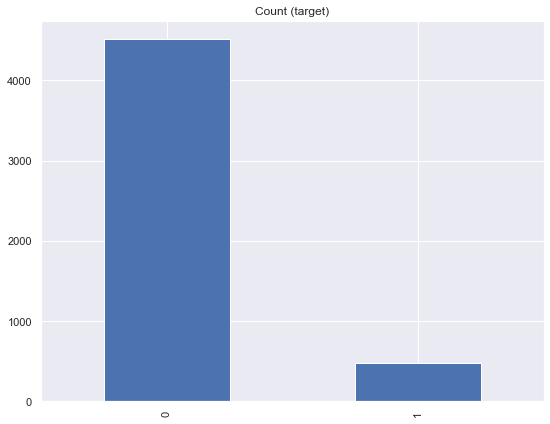

In [98]:
y.value_counts().plot(kind='bar', title='Count (target)');

In [99]:
# Target column is binary classification 0 and 1, so mean of target column will give % of 1's 
print(y.mean())

0.096


In [100]:
# 1 - mean of target column will give % of 0's
print(1-y.mean())

0.904


## Observation: 
* Target column is highly imbalanced, distribution of 0 and 1 is around 90:10 
* So there are more change 0's will be predicted correctly than 1's (Null Accuracy is around 90% for this dataset).  
* For this business case a good model should predict more value of 1's correctly (False Negatives or Type 2 errors should be less).
* Target column has to be balanced

     Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
ID                                                                          
0   25.0         1.0    49.0  91107.0     4.0    1.6        1.0       0.0   
1   45.0        19.0    34.0  90089.0     3.0    1.5        1.0       0.0   
2   39.0        15.0    11.0  94720.0     1.0    1.0        1.0       0.0   
3   35.0         9.0   100.0  94112.0     1.0    2.7        2.0       0.0   
4   35.0         8.0    45.0  91330.0     4.0    1.0        2.0       0.0   

    SecuritiesAccount  CDAccount  Online  CreditCard  
ID                                                    
0                 1.0        0.0     0.0         0.0  
1                 1.0        0.0     0.0         0.0  
2                 0.0        0.0     0.0         0.0  
3                 0.0        0.0     0.0         0.0  
4                 0.0        0.0     0.0         1.0  
(9040, 12)
ID
0    0
1    0
2    0
3    0
4    0
Name: PersonalLoan, dtype:

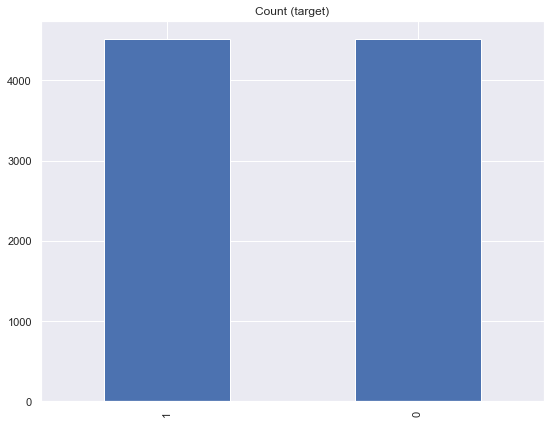

In [101]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority', n_jobs=-1,random_state=1)
X_sm, y_sm = smote.fit_resample(X, y)

X_sm = pd.DataFrame(X_sm, columns=feature_name)
X_sm.index.name = 'ID'
X_sm['PersonalLoan'] = y_sm
y_sm=X_sm.pop('PersonalLoan')

print(X_sm.head())
print(X_sm.shape)
print(y_sm.head())
print(y_sm.shape)

y_sm.value_counts().plot(kind='bar', title='Count (target)');

# 4. Split the data into training and test set in the ratio of 70:30 respectively

### Split original dataset

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=1)

In [103]:
print(X_train.shape)
print(y_train.shape)

(3500, 12)
(3500,)


In [104]:
print(X_test.shape)
print(y_test.shape)

(1500, 12)
(1500,)


### Split synthetic minority oversample dataset

In [105]:
Xsm_train, Xsm_test, ysm_train, ysm_test = train_test_split(X_sm, y_sm, train_size=0.70, random_state=1)

In [106]:
print(Xsm_train.shape)
print(ysm_train.shape)

(6328, 12)
(6328,)


In [107]:
print(Xsm_test.shape)
print(ysm_test.shape)

(2712, 12)
(2712,)


# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (30 points)

### Scaling features in original dataset to bring all features in same scale

In [108]:
X_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,
1335,47,22.0,35,94304,2,1.3,1,0,0,0,1,0
4769,38,14.0,39,93118,1,2.0,2,0,0,0,1,0
66,59,35.0,131,91360,1,3.8,1,0,0,0,1,1
178,29,3.0,65,94132,4,1.8,2,244,0,0,0,0
4490,39,13.0,21,95518,3,0.2,2,0,0,0,1,0


In [109]:
X_test.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,
2765,31,5.0,84,91320,1,2.9,3,105,0,0,0,1
4768,35,9.0,45,90639,3,0.9,1,101,1,0,0,0
3815,34,9.0,35,94304,3,1.3,1,0,0,0,0,0
3500,49,23.0,114,94550,1,0.3,1,286,0,0,1,0
2736,36,12.0,70,92131,3,2.6,2,165,0,0,1,0


In [110]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [111]:
X_train[0:5,:]

array([[ 0.13597665,  0.15483061, -0.83705838,  0.50880446, -0.34495524,
        -0.3657083 , -1.05571315, -0.55770661, -0.34173625, -0.25835623,
         0.83164805, -0.650648  ],
       [-0.64621189, -0.54215607, -0.75040637, -0.01612016, -1.21794393,
         0.03787597,  0.13545256, -0.55770661, -0.34173625, -0.25835623,
         0.83164805, -0.650648  ],
       [ 1.1788947 ,  1.28743398,  1.24258976, -0.79421247, -1.21794393,
         1.0756641 , -1.05571315, -0.55770661, -0.34173625, -0.25835623,
         0.83164805,  1.53692933],
       [-1.42840043, -1.50051277, -0.18716833,  0.43267712,  1.40102213,
        -0.07743382,  0.13545256,  1.86992266, -0.34173625, -0.25835623,
        -1.20243173, -0.650648  ],
       [-0.55930205, -0.62927941, -1.1403404 ,  1.04612191,  0.52803344,
        -0.99991216,  0.13545256, -0.55770661, -0.34173625, -0.25835623,
         0.83164805, -0.650648  ]])

In [112]:
X_test[0:5,:]

array([[-1.25458075, -1.3262661 ,  0.22442869, -0.8119165 , -1.21794393,
         0.55677004,  1.32661827,  0.48696992, -0.34173625, -0.25835623,
        -1.20243173,  1.53692933],
       [-0.9069414 , -0.97777275, -0.62042836, -1.11332769,  0.52803344,
        -0.59632789, -1.05571315,  0.44717272,  2.92623333, -0.25835623,
        -1.20243173, -0.650648  ],
       [-0.99385124, -0.97777275, -0.83705838,  0.50880446,  0.52803344,
        -0.3657083 , -1.05571315, -0.55770661, -0.34173625, -0.25835623,
        -1.20243173, -0.650648  ],
       [ 0.30979632,  0.24195395,  0.87431874,  0.61768428, -1.21794393,
        -0.94225726, -1.05571315,  2.28779327, -0.34173625, -0.25835623,
         0.83164805, -0.650648  ],
       [-0.82003156, -0.71640275, -0.07885333, -0.4529672 ,  0.52803344,
         0.38380535,  0.13545256,  1.08392794, -0.34173625, -0.25835623,
         0.83164805, -0.650648  ]])

### Scaling features in synthetic minority oversample dataset to bring all features in same scale

In [113]:
Xsm_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,
7574,45.071960,20.974272,135.293065,95135.000000,3.048844,4.148844,1.097688,219.887030,0.0,0.0,0.951156,0.0
8000,29.934131,4.567365,151.272450,92195.937122,2.633234,4.143264,1.366766,216.573347,0.0,0.0,1.000000,0.0
5350,40.571831,15.439135,186.091650,92020.826257,2.000000,5.004105,2.000000,0.000000,0.0,0.0,1.000000,0.0
6275,49.596948,23.996184,102.422130,92018.977106,1.798474,2.799237,3.000000,0.000000,0.0,0.0,0.600763,0.0
6678,44.709528,19.953746,129.709528,92099.838111,3.511563,5.129047,1.488437,85.709528,0.0,0.0,0.244218,0.0


In [114]:
Xsm_test.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
ID,,,,,,,,,,,,
343,35.000000,5.000000,22.000000,93407.000000,1.000000,0.670000,3.0,103.0,0.0,0.000000,0.0,0.000000
2201,41.000000,16.000000,111.000000,92009.000000,2.000000,0.400000,1.0,0.0,0.0,0.000000,0.0,0.000000
4678,33.000000,7.000000,115.000000,93305.000000,1.000000,2.700000,2.0,283.0,0.0,0.000000,1.0,0.000000
6561,36.873136,12.727613,141.345148,90064.654852,2.927239,2.358209,2.0,0.0,0.0,0.927239,1.0,0.927239
1122,32.000000,7.000000,38.000000,90041.000000,1.000000,1.000000,1.0,0.0,0.0,0.000000,1.0,0.000000


In [115]:
scaler.fit(Xsm_train)

Xsm_train = scaler.transform(Xsm_train)  
Xsm_test = scaler.transform(Xsm_test) 

In [116]:
Xsm_train[0:5,:]

array([[-0.02049022,  0.08457318,  0.57350049,  0.98202254,  0.51356877,
         0.68915405, -1.22439612,  1.13735128, -0.40707361, -0.51328162,
         0.76886717, -0.70598738],
       [-1.45555727, -1.47273756,  0.8771613 , -0.45583219,  0.12276519,
         0.68633617, -0.87194388,  1.111457  , -0.40707361, -0.51328162,
         0.87674554, -0.70598738],
       [-0.44710271, -0.44081093,  1.53884048, -0.54150031, -0.47267196,
         1.12100701, -0.04250186, -0.58092279, -0.40707361, -0.51328162,
         0.87674554, -0.70598738],
       [ 0.4084788 ,  0.37140703, -0.05115525, -0.54240495, -0.66216949,
         0.0076869 ,  1.26734965, -0.58092279, -0.40707361, -0.51328162,
        -0.00501803, -0.70598738],
       [-0.05484885, -0.01229311,  0.46739494, -0.50284596,  0.94866925,
         1.18409518, -0.71257406,  0.0888414 , -0.40707361, -0.51328162,
        -0.79249103, -0.70598738]])

In [117]:
Xsm_test[0:5,:]

array([[-0.97531262, -1.43167267, -1.57943993,  0.13664662, -1.41298392,
        -1.06744434,  1.26734965,  0.22395519, -0.40707361, -0.51328162,
        -1.33187699, -0.70598738],
       [-0.40651229, -0.38757475,  0.11185245, -0.54728598, -0.47267196,
        -1.20377743, -1.35235338, -0.58092279, -0.40707361, -0.51328162,
        -1.33187699, -0.70598738],
       [-1.16491273, -1.24183669,  0.18786559,  0.08674596, -1.41298392,
        -0.0424215 , -0.04250186,  1.63053807, -0.40707361, -0.51328162,
         0.87674554, -0.70598738],
       [-0.79773921, -0.69818311,  0.68850995, -1.49850273,  0.39922163,
        -0.21500451, -0.04250186, -0.58092279, -0.40707361,  2.30417769,
         0.87674554,  1.5043121 ],
       [-1.25971278, -1.24183669, -1.27538737, -1.51007521, -1.41298392,
        -0.90081501, -1.35235338, -0.58092279, -0.40707361, -0.51328162,
         0.87674554, -0.70598738]])

## 5a) Logistic regression model to predict the likelihood of a liability customer buying personal loans 

In [118]:
model_LogR = LogisticRegression()

### Training the model with original full dataset

In [119]:
model_LogR.fit(X_train,y_train)

C:\Dist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
print('Model training score ->', model_LogR.score(X_train, y_train))
print('Model testing score ->', model_LogR.score(X_test, y_test))

Model training score -> 0.9531428571428572
Model testing score -> 0.948


In [121]:
model_LogR_predict = model_LogR.predict(X_test)

In [122]:
print(metrics.accuracy_score(y_test, model_LogR_predict))

0.948


In [123]:
print(metrics.classification_report(y_test, model_LogR_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.84      0.58      0.69       149

    accuracy                           0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [124]:
print(metrics.f1_score(y_test, model_LogR_predict))

0.6904761904761905


### Training the model with SMOTE full dataset

In [125]:
model_LogR.fit(Xsm_train,ysm_train)

C:\Dist\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
print('Model training score ->', model_LogR.score(Xsm_train, ysm_train))
print('Model test score ->', model_LogR.score(Xsm_test, ysm_test))

Model training score -> 0.9119785082174463
Model test score -> 0.911504424778761


In [127]:
model_LogR_predict_sm = model_LogR.predict(Xsm_test)

In [128]:
print(metrics.accuracy_score(ysm_test, model_LogR_predict_sm))

0.911504424778761


In [129]:
print(metrics.classification_report(ysm_test, model_LogR_predict_sm))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1350
           1       0.91      0.92      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



In [130]:
print(metrics.f1_score(ysm_test, model_LogR_predict_sm))

0.9125364431486881


#### Observation: accuracy score is slightly less for SMOTE dataset, but f1 score is high when compared with original dataset. 

### For SMOTE dataset, using Sequential Feature Selection (SFS) with cross validation to find best features and consistent performance of model with different fold's for data.

In [131]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs_LogR = sfs(model_LogR, 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

In [133]:
sfs_LogR = sfs_LogR.fit(Xsm_train, ysm_train, custom_feature_names=feature_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.2s finished

[2019-10-31 19:06:36] Features: 1/12 -- score: 0.8759284856324685[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.4s finished

[2019-10-31 19:06:36] Features: 2/12 -- score: 0.8844991624473486[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2019-10-31 19:06:37] Features: 3/12 -- score: 0.8866429270527959[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

##### Verify the selected feature indices at each step

In [134]:
sfs_LogR.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.86923077, 0.88393543, 0.8716372 , 0.86733902, 0.8875    ]),
  'avg_score': 0.8759284856324685,
  'feature_names': ('Income',),
  'ci_bound': 0.010521573388360291,
  'std_dev': 0.008186141548573613,
  'std_err': 0.0040930707742868055},
 2: {'feature_idx': (2, 5),
  'cv_scores': array([0.874613  , 0.89489954, 0.88153846, 0.87596899, 0.89547582]),
  'avg_score': 0.8844991624473486,
  'feature_names': ('Income', 'CCAvg'),
  'ci_bound': 0.011609250561931744,
  'std_dev': 0.009032391341580662,
  'std_err': 0.004516195670790331},
 3: {'feature_idx': (2, 5, 10),
  'cv_scores': array([0.87374129, 0.89792786, 0.88411358, 0.87937743, 0.89805447]),
  'avg_score': 0.8866429270527959,
  'feature_names': ('Income', 'CCAvg', 'Online'),
  'ci_bound': 0.012635271958157246,
  'std_dev': 0.009830670845163161,
  'std_err': 0.004915335422581581},
 4: {'feature_idx': (2, 5, 8, 10),
  'cv_scores': array([0.87944359, 0.90153846, 0.88615385, 0.87801088, 0.899610

##### Score and Standard Deviation is better for features #7

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x173779e0e80>)

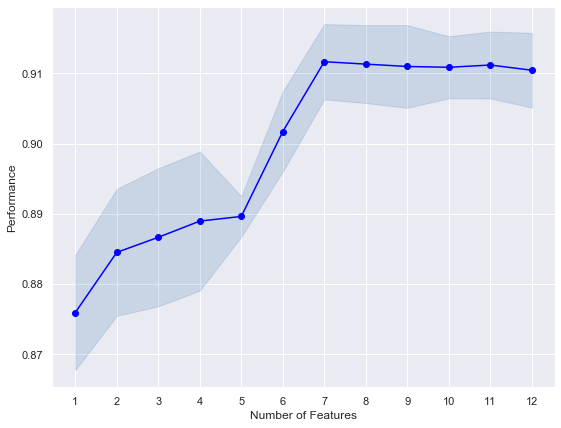

In [135]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs_LogR.get_metric_dict(), kind='std_dev')

##### Index, Names and Score for the best of the features 

In [136]:
print('Index of best of the features ---> ', sfs_LogR.subsets_[7]['feature_idx'])
print('Names of best of the features ---> ', sfs_LogR.subsets_[7]['feature_names'])
print('Score of best of the features ---> ', sfs_LogR.subsets_[7]['avg_score'])

Index of best of the features --->  (2, 4, 5, 6, 8, 9, 10)
Names of best of the features --->  ('Income', 'Family', 'CCAvg', 'Education', 'SecuritiesAccount', 'CDAccount', 'Online')
Score of best of the features --->  0.9116546719848941


In [137]:
feature_index = sfs_LogR.subsets_[7]['feature_idx']

In [138]:
feature_index

(2, 4, 5, 6, 8, 9, 10)

In [139]:
Xsm_train

array([[-0.02049022,  0.08457318,  0.57350049, ..., -0.51328162,
         0.76886717, -0.70598738],
       [-1.45555727, -1.47273756,  0.8771613 , ..., -0.51328162,
         0.87674554, -0.70598738],
       [-0.44710271, -0.44081093,  1.53884048, ..., -0.51328162,
         0.87674554, -0.70598738],
       ...,
       [ 0.06748798,  0.18193321, -1.46542022, ..., -0.51328162,
         0.87674554,  1.67775652],
       [-0.22726646, -0.20810593,  0.43532341, ..., -0.51328162,
        -1.33187699, -0.70598738],
       [-0.69091246, -1.1469187 , -0.64827896, ..., -0.51328162,
         0.87674554, -0.70598738]])

In [140]:
Xsm_train.shape

(6328, 12)

In [141]:
Xsm_train_sfs_LogR = Xsm_train[:, feature_index]

In [142]:
Xsm_train_sfs_LogR

array([[ 0.57350049,  0.51356877,  0.68915405, ..., -0.40707361,
        -0.51328162,  0.76886717],
       [ 0.8771613 ,  0.12276519,  0.68633617, ..., -0.40707361,
        -0.51328162,  0.87674554],
       [ 1.53884048, -0.47267196,  1.12100701, ..., -0.40707361,
        -0.51328162,  0.87674554],
       ...,
       [-1.46542022, -1.41298392, -0.90081501, ..., -0.40707361,
        -0.51328162,  0.87674554],
       [ 0.43532341,  1.40795196,  1.26048855, ..., -0.40707361,
        -0.51328162, -1.33187699],
       [-0.64827896,  1.40795196, -0.49686513, ..., -0.40707361,
        -0.51328162,  0.87674554]])

In [143]:
Xsm_train_sfs_LogR.shape

(6328, 7)

In [144]:
Xsm_test_sfs_LogR = Xsm_test[:, feature_index]

In [145]:
Xsm_test_sfs_LogR.shape

(2712, 7)

#### Fit and train the Logistic Regression model the selected features

In [146]:
model_LogR.fit(Xsm_train_sfs_LogR,ysm_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
print('Model training score ->', model_LogR.score(Xsm_train_sfs_LogR, ysm_train))
print('Model testing score ->', model_LogR.score(Xsm_test_sfs_LogR, ysm_test))

Model training score -> 0.9110303413400759
Model testing score -> 0.9081858407079646


In [148]:
model_LogR_predict = model_LogR.predict(Xsm_test_sfs_LogR)

In [149]:
print('Model accuracy score ->', metrics.accuracy_score(ysm_test, model_LogR_predict))
print('Model f1 score ->',metrics.f1_score(ysm_test, model_LogR_predict))

Model accuracy score -> 0.9081858407079646
Model f1 score -> 0.9092896174863389


## 5b) K-NN model to predict the likelihood of a liability customer buying personal loans

### Training the model with original full dataset and find best K neighbors value

In [150]:
k_neighbors = np.arange(1, 20, 2)
train_accuracy_plot = np.empty(len(k_neighbors))
test_accuracy_plot = np.empty(len(k_neighbors))
test_f1_plot = np.empty(len(k_neighbors))
for i, k in enumerate(k_neighbors):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train,y_train)
    train_accuracy_plot[i] = model_KNN.score(X_train,y_train)
    test_accuracy_plot[i] = model_KNN.score(X_test,y_test)
    model_KNN_predict = model_KNN.predict(X_test)
    test_f1_plot[i] = metrics.f1_score(y_test, model_KNN_predict)

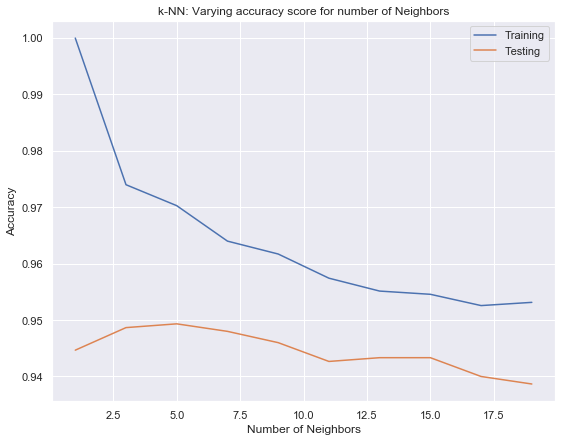

In [151]:
from matplotlib import pyplot as plt
plt.title('k-NN: Varying accuracy score for number of Neighbors')
plt.plot(k_neighbors, train_accuracy_plot, label = 'Training')
plt.plot(k_neighbors, test_accuracy_plot, label = 'Testing')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Training accuracy is better for 3 neighbors, but testing accuracy is slightly better for 5 neighbors.

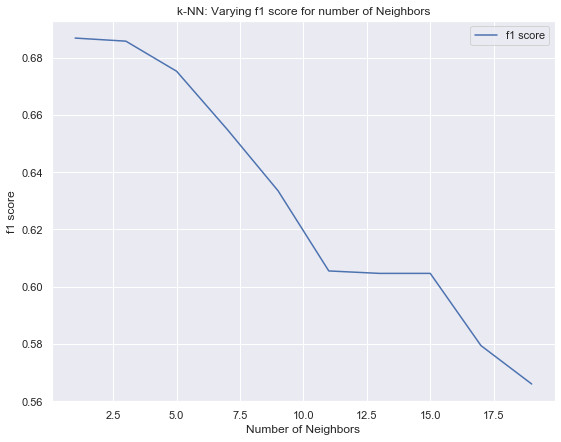

In [152]:
plt.title('k-NN: Varying f1 score for number of Neighbors')
plt.plot(k_neighbors, test_f1_plot, label = 'f1 score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('f1 score')
plt.show()

#### f1 score is better for 3 neighbors 

### Training the model with SMOTE full dataset and find best K neighbors value

In [153]:
k_neighbors = np.arange(1, 20, 2)
train_accuracy_plot = np.empty(len(k_neighbors))
test_accuracy_plot = np.empty(len(k_neighbors))
test_f1_plot = np.empty(len(k_neighbors))
for i, k in enumerate(k_neighbors):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(Xsm_train,ysm_train)
    train_accuracy_plot[i] = model_KNN.score(Xsm_train,ysm_train)
    test_accuracy_plot[i] = model_KNN.score(Xsm_test,ysm_test)
    model_KNN_predict = model_KNN.predict(Xsm_test)
    test_f1_plot[i] = metrics.f1_score(ysm_test, model_KNN_predict)

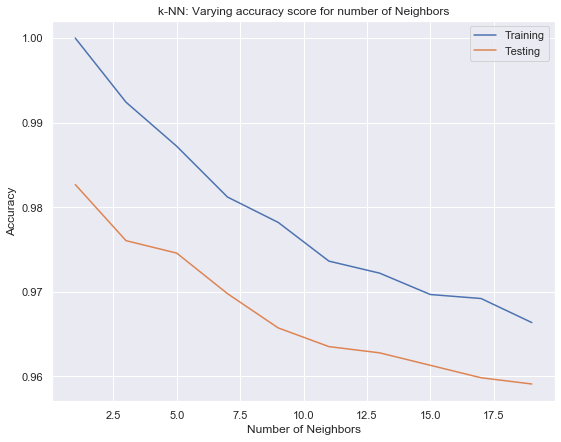

In [154]:
plt.title('k-NN: Varying accuracy score for number of Neighbors')
plt.plot(k_neighbors, train_accuracy_plot, label = 'Training')
plt.plot(k_neighbors, test_accuracy_plot, label = 'Testing')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Training and testing accuracy is better for 3 neighbors.

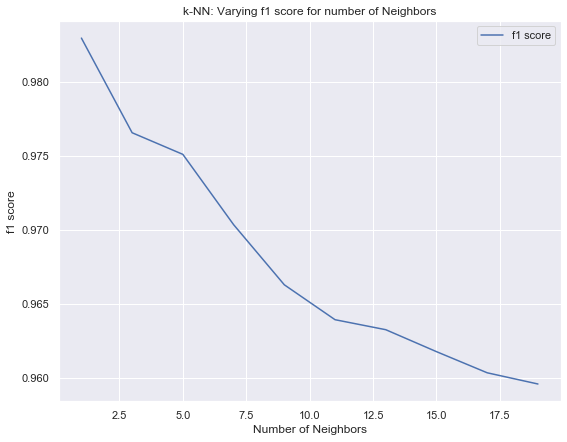

In [155]:
plt.title('k-NN: Varying f1 score for number of Neighbors')
plt.plot(k_neighbors, test_f1_plot, label = 'f1 score')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('f1 score')
plt.show()

#### f1 score is better for 3 neighbors

In [156]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

In [158]:
model_KNN.fit(X_train,y_train)
model_KNN_predict = model_KNN.predict(X_test)
print('Model accuracy score ->', metrics.accuracy_score(y_test, model_KNN_predict))
print('Model f1 score ->',metrics.f1_score(y_test, model_KNN_predict))

Model accuracy score -> 0.9486666666666667
Model f1 score -> 0.6857142857142856


In [159]:
model_KNN.fit(Xsm_train,ysm_train)
model_KNN_predict = model_KNN.predict(Xsm_test)
print('Model accuracy score ->', metrics.accuracy_score(ysm_test, model_KNN_predict))
print('Model f1 score ->',metrics.f1_score(ysm_test, model_KNN_predict))

Model accuracy score -> 0.9760324483775811
Model f1 score -> 0.9765596826541652


### Observation: accuracy score and f1 score are high for SMOTE dataset, when compared with original dataset.

### For SMOTE dataset, using Sequential Feature Selection (SFS) with cross validation to find best features and consistent performance of model with different fold's for data.

In [160]:
sfs_KNN = sfs(model_KNN, 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

In [161]:
sfs_KNN = sfs_KNN.fit(Xsm_train, ysm_train, custom_feature_names=feature_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.0s finished

[2019-10-31 19:30:23] Features: 1/12 -- score: 0.9144894228605516[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.7s finished

[2019-10-31 19:30:27] Features: 2/12 -- score: 0.9315201525084149[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.5s finished

[2019-10-31 19:30:31] Features: 3/12 -- score: 0.9558201139375735[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

#### Verify the selected feature indices at each step

In [162]:
sfs_KNN.get_metric_dict()

{1: {'feature_idx': (5,),
  'cv_scores': array([0.92408163, 0.91149711, 0.91366303, 0.9       , 0.92320534]),
  'avg_score': 0.9144894228605516,
  'feature_names': ('CCAvg',),
  'ci_bound': 0.011315787640430444,
  'std_dev': 0.008804067218752681,
  'std_err': 0.004402033609376341},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.92941176, 0.93210394, 0.93802345, 0.91983122, 0.93823038]),
  'avg_score': 0.9315201525084149,
  'feature_names': ('CCAvg', 'Education'),
  'ci_bound': 0.008693304486031412,
  'std_dev': 0.0067636862302581525,
  'std_err': 0.003381843115129076},
 3: {'feature_idx': (2, 5, 6),
  'cv_scores': array([0.95313741, 0.95583596, 0.9610183 , 0.9468599 , 0.962249  ]),
  'avg_score': 0.9558201139375735,
  'feature_names': ('Income', 'CCAvg', 'Education'),
  'ci_bound': 0.007175427267736453,
  'std_dev': 0.005582726187146755,
  'std_err': 0.002791363093573377},
 4: {'feature_idx': (2, 4, 5, 6),
  'cv_scores': array([0.98490866, 0.98651864, 0.98888889, 0.98478783, 0.991

#### Score and Standard Deviation is better for features #4

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17377c69668>)

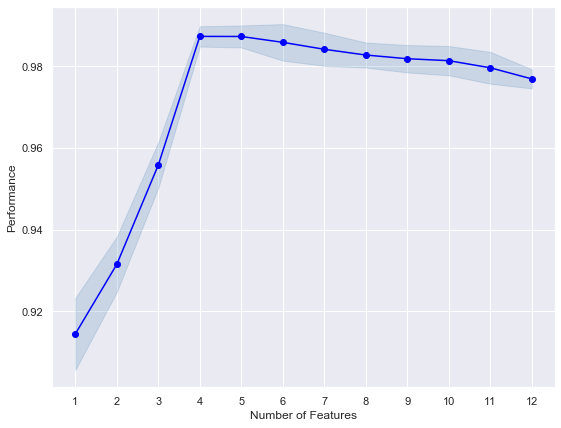

In [163]:
plot_sfs(sfs_KNN.get_metric_dict(), kind='std_dev')

#### Index, Names and Score for the best of the features

In [164]:
print('Index of best of the features ---> ', sfs_KNN.subsets_[4]['feature_idx'])
print('Names of best of the features ---> ', sfs_KNN.subsets_[4]['feature_names'])
print('Score of best of the features ---> ', sfs_KNN.subsets_[4]['avg_score'])

Index of best of the features --->  (2, 4, 5, 6)
Names of best of the features --->  ('Income', 'Family', 'CCAvg', 'Education')
Score of best of the features --->  0.9872733839780377


In [165]:
feature_index = sfs_KNN.subsets_[4]['feature_idx']

In [166]:
feature_index

(2, 4, 5, 6)

In [167]:
Xsm_train

array([[-0.02049022,  0.08457318,  0.57350049, ..., -0.51328162,
         0.76886717, -0.70598738],
       [-1.45555727, -1.47273756,  0.8771613 , ..., -0.51328162,
         0.87674554, -0.70598738],
       [-0.44710271, -0.44081093,  1.53884048, ..., -0.51328162,
         0.87674554, -0.70598738],
       ...,
       [ 0.06748798,  0.18193321, -1.46542022, ..., -0.51328162,
         0.87674554,  1.67775652],
       [-0.22726646, -0.20810593,  0.43532341, ..., -0.51328162,
        -1.33187699, -0.70598738],
       [-0.69091246, -1.1469187 , -0.64827896, ..., -0.51328162,
         0.87674554, -0.70598738]])

In [168]:
Xsm_train.shape

(6328, 12)

In [169]:
Xsm_train_sfs_KNN = Xsm_train[:, feature_index]

In [170]:
Xsm_train_sfs_KNN

array([[ 0.57350049,  0.51356877,  0.68915405, -1.22439612],
       [ 0.8771613 ,  0.12276519,  0.68633617, -0.87194388],
       [ 1.53884048, -0.47267196,  1.12100701, -0.04250186],
       ...,
       [-1.46542022, -1.41298392, -0.90081501, -1.35235338],
       [ 0.43532341,  1.40795196,  1.26048855, -1.35235338],
       [-0.64827896,  1.40795196, -0.49686513,  1.26734965]])

In [171]:
Xsm_train_sfs_KNN.shape

(6328, 4)

In [172]:
Xsm_test_sfs_KNN = Xsm_test[:, feature_index]

In [173]:
Xsm_test_sfs_KNN.shape

(2712, 4)

#### Fit and train the KNN model the selected features

In [174]:
model_KNN.fit(Xsm_train_sfs_KNN,ysm_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [175]:
print('Model training score ->', model_KNN.score(Xsm_train_sfs_KNN, ysm_train))
print('Model testing score ->', model_KNN.score(Xsm_test_sfs_KNN, ysm_test))

Model training score -> 0.9958912768647282
Model testing score -> 0.9841445427728613


In [176]:
model_KNN_predict = model_KNN.predict(Xsm_test_sfs_KNN)

In [177]:
print('Model accuracy score ->', metrics.accuracy_score(ysm_test, model_KNN_predict))
print('Model f1 score ->',metrics.f1_score(ysm_test, model_KNN_predict))

Model accuracy score -> 0.9841445427728613
Model f1 score -> 0.9840799703813403


## 5c) Naive Bayes model to predict the likelihood of a liability customer buying personal loans

In [178]:
model_NB = GaussianNB()

#### Training the model with original dataset and all the features

In [179]:
model_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [180]:
print('Model training score ->', model_NB.score(X_train, y_train))
print('Model testing score ->', model_NB.score(X_test, y_test))

Model training score -> 0.89
Model testing score -> 0.8766666666666667


In [181]:
model_NB_predict = model_NB.predict(X_test)

In [182]:
print(metrics.classification_report(y_test, model_NB_predict))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.48       149

    accuracy                           0.88      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.88      0.88      1500



In [183]:
print(metrics.f1_score(y_test, model_NB_predict))

0.4759206798866855


#### Training the model with SMOTE full dataset

In [184]:
model_NB.fit(Xsm_train,ysm_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [185]:
print('Model training score ->', model_NB.score(Xsm_train, ysm_train))
print('Model testing score ->', model_NB.score(Xsm_test, ysm_test))

Model training score -> 0.8770543615676359
Model testing score -> 0.8716814159292036


In [186]:
model_NB_predict_sm = model_NB.predict(Xsm_test)

In [187]:
print(metrics.classification_report(ysm_test, model_NB_predict_sm))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1350
           1       0.88      0.86      0.87      1362

    accuracy                           0.87      2712
   macro avg       0.87      0.87      0.87      2712
weighted avg       0.87      0.87      0.87      2712



In [188]:
print(metrics.accuracy_score(ysm_test, model_NB_predict_sm))

0.8716814159292036


In [189]:
print(metrics.f1_score(ysm_test, model_NB_predict_sm))

0.870439314966493


### Observation: accuracy score is slightly less for SMOTE dataset, but f1 score is high when compared with original dataset.

### For SMOTE dataset, using Sequential Feature Selection (SFS) with cross validation to find best features and consistent performance of model with different fold's for data.

In [190]:
sfs_NB = sfs(model_NB, 
           k_features=12, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='f1',
           cv=5)

In [191]:
sfs_NB = sfs_NB.fit(Xsm_train, ysm_train, custom_feature_names=feature_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2019-10-31 19:47:42] Features: 1/12 -- score: 0.8774901046475371[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2019-10-31 19:47:42] Features: 2/12 -- score: 0.8905721111619875[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2019-10-31 19:47:42] Features: 3/12 -- score: 0.9004804775779245[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

#### Verify the selected feature indices at each step

In [192]:
sfs_NB.get_metric_dict()

{1: {'feature_idx': (2,),
  'cv_scores': array([0.87009992, 0.88479263, 0.87509579, 0.86909373, 0.88836846]),
  'avg_score': 0.8774901046475371,
  'feature_names': ('Income',),
  'ci_bound': 0.009997419016960952,
  'std_dev': 0.00777833164037819,
  'std_err': 0.0038891658201890946},
 2: {'feature_idx': (2, 6),
  'cv_scores': array([0.88958991, 0.89563863, 0.88613478, 0.88      , 0.90149724]),
  'avg_score': 0.8905721111619875,
  'feature_names': ('Income', 'Education'),
  'ci_bound': 0.009574378101358985,
  'std_dev': 0.0074491914359495455,
  'std_err': 0.0037245957179747723},
 3: {'feature_idx': (2, 4, 6),
  'cv_scores': array([0.89889415, 0.90202177, 0.89358372, 0.89361702, 0.91428571]),
  'avg_score': 0.9004804775779245,
  'feature_names': ('Income', 'Family', 'Education'),
  'ci_bound': 0.009790995045625282,
  'std_dev': 0.007617726777778277,
  'std_err': 0.003808863388889138},
 4: {'feature_idx': (2, 4, 6, 11),
  'cv_scores': array([0.90047393, 0.90327613, 0.89773614, 0.89584965, 

#### Score and Standard Deviation is better for features #7

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x17377d84588>)

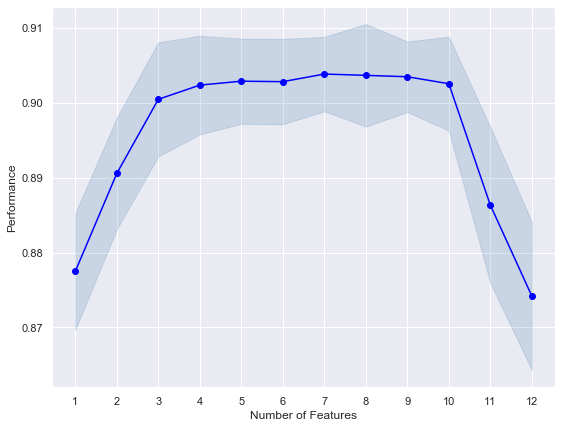

In [193]:
plot_sfs(sfs_NB.get_metric_dict(), kind='std_dev')

#### Index, Names and Score for the best of the features

In [194]:
print('Index of best of the features ---> ', sfs_NB.subsets_[7]['feature_idx'])
print('Names of best of the features ---> ', sfs_NB.subsets_[7]['feature_names'])
print('Score of best of the features ---> ', sfs_NB.subsets_[7]['avg_score'])

Index of best of the features --->  (1, 2, 3, 4, 6, 8, 11)
Names of best of the features --->  ('Experience', 'Income', 'ZIPCode', 'Family', 'Education', 'SecuritiesAccount', 'CreditCard')
Score of best of the features --->  0.9038573236621277


In [195]:
feature_index = sfs_NB.subsets_[7]['feature_idx']

In [196]:
feature_index

(1, 2, 3, 4, 6, 8, 11)

In [197]:
Xsm_train

array([[-0.02049022,  0.08457318,  0.57350049, ..., -0.51328162,
         0.76886717, -0.70598738],
       [-1.45555727, -1.47273756,  0.8771613 , ..., -0.51328162,
         0.87674554, -0.70598738],
       [-0.44710271, -0.44081093,  1.53884048, ..., -0.51328162,
         0.87674554, -0.70598738],
       ...,
       [ 0.06748798,  0.18193321, -1.46542022, ..., -0.51328162,
         0.87674554,  1.67775652],
       [-0.22726646, -0.20810593,  0.43532341, ..., -0.51328162,
        -1.33187699, -0.70598738],
       [-0.69091246, -1.1469187 , -0.64827896, ..., -0.51328162,
         0.87674554, -0.70598738]])

In [198]:
Xsm_train.shape

(6328, 12)

In [199]:
Xsm_train_sfs_NB = Xsm_train[:, feature_index]

In [200]:
Xsm_train_sfs_NB

array([[ 0.08457318,  0.57350049,  0.98202254, ..., -1.22439612,
        -0.40707361, -0.70598738],
       [-1.47273756,  0.8771613 , -0.45583219, ..., -0.87194388,
        -0.40707361, -0.70598738],
       [-0.44081093,  1.53884048, -0.54150031, ..., -0.04250186,
        -0.40707361, -0.70598738],
       ...,
       [ 0.18193321, -1.46542022,  0.77899533, ..., -1.35235338,
        -0.40707361,  1.67775652],
       [-0.20810593,  0.43532341, -0.50619131, ..., -1.35235338,
        -0.40707361, -0.70598738],
       [-1.1469187 , -0.64827896,  0.77899533, ...,  1.26734965,
        -0.40707361, -0.70598738]])

In [201]:
Xsm_train_sfs_NB.shape

(6328, 7)

In [202]:
Xsm_test_sfs_NB = Xsm_test[:, feature_index]

#### Fit and train the Naive Bayes model the selected features

In [203]:
model_NB.fit(Xsm_train_sfs_NB,ysm_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [204]:
print('Model training score ->', model_NB.score(Xsm_train_sfs_NB, ysm_train))
print('Model testing score ->', model_NB.score(Xsm_test_sfs_NB, ysm_test))

Model training score -> 0.9020227560050569
Model testing score -> 0.911504424778761


In [205]:
model_NB_predict = model_NB.predict(Xsm_test_sfs_NB)

In [206]:
print('Model accuracy score ->', metrics.accuracy_score(ysm_test, model_NB_predict))
print('Model f1 score ->',metrics.f1_score(ysm_test, model_NB_predict))

Model accuracy score -> 0.911504424778761
Model f1 score -> 0.9132321041214752


# 6. Print the confusion matrix for all the above models (10 points)

### Evaluating Logistic regression model 

In [207]:
print(metrics.confusion_matrix(ysm_test, model_LogR_predict))

[[1215  135]
 [ 114 1248]]


In [208]:
print(metrics.classification_report(ysm_test, model_LogR_predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1350
           1       0.90      0.92      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



In [209]:
print(metrics.accuracy_score(ysm_test, model_LogR_predict))

0.9081858407079646


In [210]:
print(metrics.f1_score(ysm_test, model_LogR_predict))

0.9092896174863389


### Evaluating K-NN model

In [211]:
print(metrics.confusion_matrix(ysm_test, model_KNN_predict))

[[1340   10]
 [  33 1329]]


In [212]:
print(metrics.classification_report(ysm_test, model_KNN_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1350
           1       0.99      0.98      0.98      1362

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



In [213]:
print(metrics.accuracy_score(ysm_test, model_KNN_predict))

0.9841445427728613


In [214]:
print(metrics.f1_score(ysm_test, model_KNN_predict))

0.9840799703813403


### Evaluating Naive Bayes model

In [215]:
print(metrics.confusion_matrix(ysm_test, model_NB_predict))

[[1209  141]
 [  99 1263]]


In [216]:
print(metrics.classification_report(ysm_test, model_NB_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1350
           1       0.90      0.93      0.91      1362

    accuracy                           0.91      2712
   macro avg       0.91      0.91      0.91      2712
weighted avg       0.91      0.91      0.91      2712



In [217]:
print(metrics.accuracy_score(ysm_test, model_NB_predict))

0.911504424778761


In [218]:
print(metrics.f1_score(ysm_test, model_NB_predict))

0.9132321041214752


# 7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

#### Since target value is unbalanced in original dataset, f1 score for Logistic, KNN and Naive Biase models is less.
#### With SMOTE dataset, f1 score is better for Logistic, KNN and Naive Biase models.

## Logistic Regression model

### * Original dataset
###### ---> accuracy score is 0.948
###### ---> f1 score is 0.6904761904761905

### * SMOTE dataset with 7 selected features
###### ---> accuracy score is 0.9081858407079646
###### ---> f1 score is 0.9092896174863389

## KNN model

### * Original dataset
###### ---> accuracy score is 0.9486666666666667
###### ---> f1 score is 0.6857142857142856

### * SMOTE dataset with 4 selected features
###### ---> accuracy score is 0.9841445427728613
###### ---> f1 score is 0.9840799703813403

## Naive Biase model 

### * Original dataset
###### ---> accuracy score is 0.8766666666666667
###### ---> f1 score is 0.4759206798866855

### * SMOTE dataset with 7 selected features
###### ---> accuracy score is 0.911504424778761
###### ---> f1 score is 0.9132321041214752

## Conclusion: 
### Comparing the scores for these 3 models with original dataset; Logistic regression model give slightly better score when compared to KNN model, but f1 score is very less when compared with accuracy score for all three model. 

### Comparing the scores for these 3 models with SMOTE dataset and selected features, KNN model gives much better score with less features. Also with original dataset KNN model performs almost similar to Logistic regression.

### KNN model performs better in this case.